# 보험 다모아 사이트 크롤링
- 크롤링한 데이터 전처리
- `전체금액 / (만기연령 - 시작연령)` 계산하고 그래프 그리기


1. 파일 불러오기

2. 전처리 (preprocessing)

3. 그래프 그리기

In [1]:
import pandas as pd

### 1. 파일 불러오기

In [1]:
result_df = pd.read_csv("guaranteeIns.csv")
result_df.tail(2)

age company                              etc name  \
132   0~55  미래에셋생명    보장(담보) 총5종, 80세만기 20년납, 순수보장형  암보험   
133  19~60    동양생명  보장(담보) 총7종, 80세만기/20년납(월납)<....  암보험   

                            product total_cost  
132  미래에셋생명 온라인 암보험 무배당 1904[기본환급형]     11,780  
133        (무)수호천사온라인꽉채운암보험(무해지환급형)     12,550

In [2]:
# NaN으로 비어 있는 데이터 "-"로 치환하기
result_df.fillna("-", inplace=True)

In [3]:
# 순수보장형 데이터만 찾기
result_df[result_df["etc"].str.contains("순수보장형")].tail()

age company                              etc name  \
121  15~60   라이나생명  보장(담보)개수 6개, 10년만기, 10년납, 순수보장형  암보험   
125  19~50    신한생명      보장(담보) 총4종/80세만기/20년납/순수보장형  암보험   
129  19~50    신한생명      보장(담보) 총4종/80세만기/20년납/순수보장형  암보험   
130   0~55  미래에셋생명    보장(담보) 총5종, 80세만기 20년납, 순수보장형  암보험   
132   0~55  미래에셋생명    보장(담보) 총5종, 80세만기 20년납, 순수보장형  암보험   

                             product total_cost  
121                  (무) 플러스암보험(갱신형)      1,800  
125      신한인터넷암보험(무배당, 무해지환급형)(비갱신형)      7,400  
129              신한인터넷암보험(무배당)(비갱신형)     10,200  
130  미래에셋생명 온라인 암보험 무배당 1904[무해지환급형]     10,250  
132   미래에셋생명 온라인 암보험 무배당 1904[기본환급형]     11,780

### 2. 전처리
- object의 데이터 타입을 산술연산이 가능한 int 데이터 타입으로 변경
- 범위의 문자열로 되어 있는 age를 start_age와 end_age로 컬럼 수정
- `total_cost / (end_age - start_age)` 를 계산하여 cost_per_year 컬럼 생성
- 보험사별 `cost_per_year`의 평균값 데이터 프레임 만들기

#### 2.1 object의 데이터 타입을 산술연산이 가능한 int 데이터 타입으로 변경

In [4]:
# 데이터 타입 확인
result_df.dtypes

age           object
company       object
etc           object
name          object
product       object
total_cost    object
dtype: object

In [5]:
# total_cost int 데이터 타입으로 바꾸기
result_df["total_cost"] = result_df["total_cost"].apply(lambda data:data.replace(",", "")).astype("int")
result_df.tail(2)

age company                              etc name  \
132   0~55  미래에셋생명    보장(담보) 총5종, 80세만기 20년납, 순수보장형  암보험   
133  19~60    동양생명  보장(담보) 총7종, 80세만기/20년납(월납)<....  암보험   

                            product  total_cost  
132  미래에셋생명 온라인 암보험 무배당 1904[기본환급형]       11780  
133        (무)수호천사온라인꽉채운암보험(무해지환급형)       12550

In [6]:
result_df.dtypes

age           object
company       object
etc           object
name          object
product       object
total_cost     int64
dtype: object

#### 2.2 범위의 문자열로 되어 있는 age를 start_age와 end_age로 컬럼 수정

In [7]:
# age 컬럼은 start_age와 end_age로 컬럼 나누기
result_df["start_age"] = result_df["age"].apply(lambda data:data.split("~")[0]).astype("int")
result_df["end_age"] = result_df["age"].apply(lambda data:data.split("~")[1]).astype("int")
result_df.drop("age", axis=1, inplace=True)
result_df.tail(2)

company                              etc name  \
132  미래에셋생명    보장(담보) 총5종, 80세만기 20년납, 순수보장형  암보험   
133    동양생명  보장(담보) 총7종, 80세만기/20년납(월납)<....  암보험   

                            product  total_cost  start_age  end_age  
132  미래에셋생명 온라인 암보험 무배당 1904[기본환급형]       11780          0       55  
133        (무)수호천사온라인꽉채운암보험(무해지환급형)       12550         19       60

#### 2.3 `total_cost / (end_age - start_age)` 를 계산하여 cost_per_year 컬럼 생성

In [8]:
# 계산하기 ( total_cost / (end_age - start_age) )
result_df["cost_per_year"] = result_df["total_cost"] / (result_df["end_age"] - result_df["start_age"])
result_df.tail(2)

company                              etc name  \
132  미래에셋생명    보장(담보) 총5종, 80세만기 20년납, 순수보장형  암보험   
133    동양생명  보장(담보) 총7종, 80세만기/20년납(월납)<....  암보험   

                            product  total_cost  start_age  end_age  \
132  미래에셋생명 온라인 암보험 무배당 1904[기본환급형]       11780          0       55   
133        (무)수호천사온라인꽉채운암보험(무해지환급형)       12550         19       60   

     cost_per_year  
132     214.181818  
133     306.097561

#### 2.4 보험사별 `cost_per_year`의 평균값 데이터 프레임 만들기

In [9]:
# 보험사별 평균 cost_per_year
result = result_df.groupby(["company"]).agg("mean")["cost_per_year"].reset_index(name="cost_per_year")

# 소수 2째 자리에서 반올림
result["cost_per_year"] = round(result["cost_per_year"], 2)
result.head(3)

company  cost_per_year
0        ABL생명         354.69
1        AIG손보         178.53
2  BNP파리바카디프생명         187.20

In [10]:
# cost_per_year가 높은 순으로 정렬
result = result.sort_values(["cost_per_year"], ascending=False).reset_index(drop=True)
result.head(3)

company  cost_per_year
0    동양생명        1844.86
1    농협생명        1338.24
2    KB손보         606.39

#### 3. 그래프 그리기
- 보험사별 `cost_per_year`의 평균값 그래프 그리기

In [11]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [12]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
sns.set()

In [14]:
mpl.rc('font', family="AppleGothic")

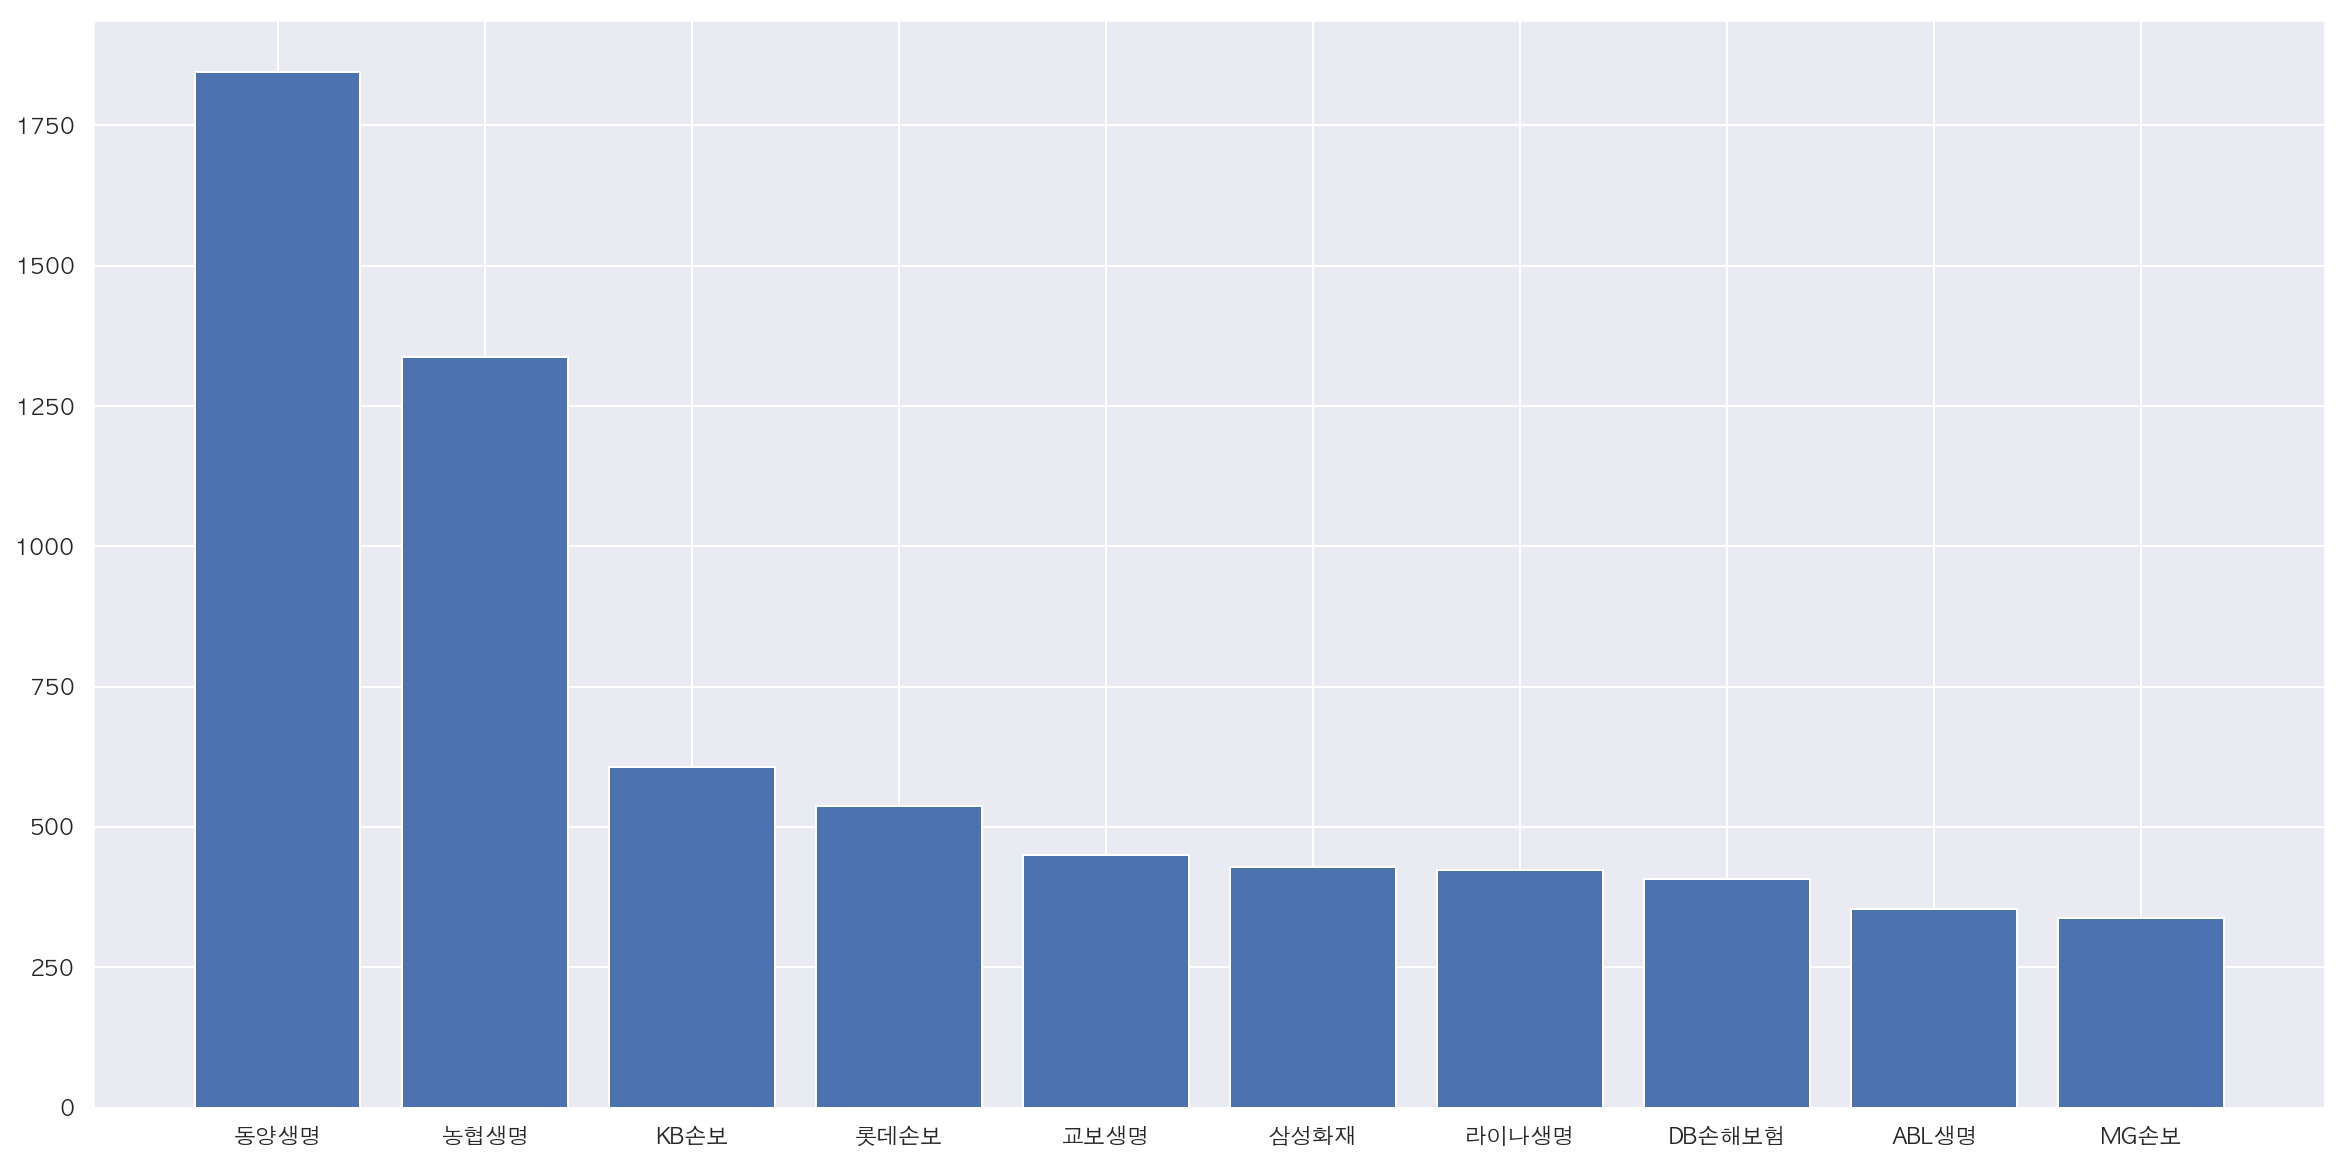

In [15]:
plt.figure(figsize=(20, 10))
plt.bar(result["company"][:10], result["cost_per_year"][:10])
plt.show()